In [15]:
# TODO: Create summary report
# TODO: Generate visualization
# TODO: Save data and report to files

In [16]:
pip install requests pandas matplotlib python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Access the API keys
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')
NEWS_API_KEY = os.getenv('NEWS_API_KEY')

# Print to verify (only for testing, remove in production code)
print(OPENWEATHER_API_KEY)
print(NEWS_API_KEY)


943e421b040ba3d137f65faf4612851b
f24d10254296470c93a87ab823952078


In [18]:
def process_data(weather_data, news_data):
    """Process and combine weather and news data"""
    city_name = weather_data['name']
    country_code = weather_data['sys']['country']
    
    # Extract weather information
    current_temp = weather_data['main']['temp']
    weather_description = weather_data['weather'][0]['description']
    
    # Extract news headlines
    headlines = [article['title'] for article in news_data['articles'][:3]]  # Top 3 headlines
    
    return {
        'city': city_name,
        'country': country_code,
        'current_temp': current_temp,
        'weather_description': weather_description,
        'headlines': headlines
    }


In [19]:
def create_visualization(data):
    """Create a visualization of the processed data"""
    cities = [entry['city'] for entry in data]
    temperatures = [entry['current_temp'] for entry in data]

    plt.figure(figsize=(10, 6))
    plt.bar(cities, temperatures, color='blue')
    plt.xlabel('Cities')
    plt.ylabel('Temperature (°C)')
    plt.title('Current Temperature in Different Cities')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('temperature_visualization.png')  # Save the plot
    plt.show()


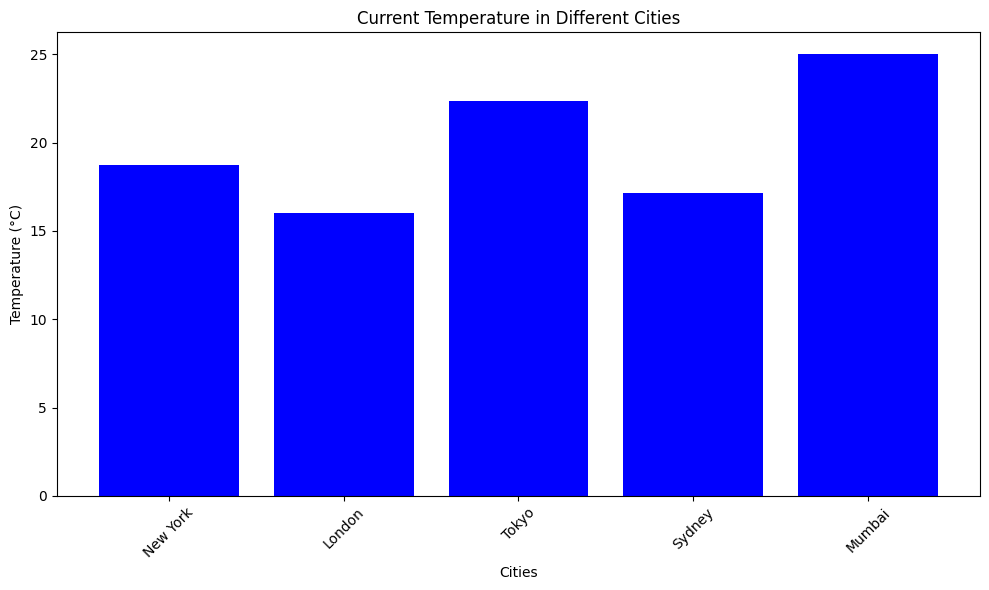

In [20]:
import requests  # Make sure this is imported
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# List of cities to analyze
cities = ['New York', 'London', 'Tokyo', 'Sydney', 'Mumbai']

def get_weather_data(city):
    """Fetch weather data for a given city using OpenWeatherMap API"""
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city,
        'appid': OPENWEATHER_API_KEY,
        'units': 'metric'
    }
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def get_news_headlines(country_code):
    """Fetch top headlines for a given country code using NewsAPI"""
    base_url = "https://newsapi.org/v2/top-headlines"
    params = {
        'country': country_code,
        'apiKey': NEWS_API_KEY
    }
    response = requests.get(base_url, params=params, timeout=10)
    response.raise_for_status()
    return response.json()


def save_data(data, filename):
    """Save data to a file"""
    with open(filename, 'w') as f:
        json.dump(data, f, indent=2)

def main():
    all_data = []
    for city in cities:
        try:
            weather = get_weather_data(city)
            country_code = weather['sys']['country'].lower()  # Convert to lowercase for API
            news = get_news_headlines(country_code)
            processed_data = process_data(weather, news)
            all_data.append(processed_data)
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for {city}: {e}")
    
    # Example: create visualization and save data
    create_visualization(all_data)
    save_data(all_data, 'weather_news_data.json')

if __name__ == "__main__":
    main()
